## Enade 2017 - Universidade Federal de Campina Grande (UFCG)

In [1]:
# Biblioteca científica
import numpy as np
# Biblioteca para análise de dados
import pandas as pd
# Suprimindo os warnings da biblioteca pandas
pd.options.mode.chained_assignment = None
# Bibliotecas de visualização de dados
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.ticker as mtick
plt.style.use('ggplot')
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

### Carregando e verificando os dados

In [2]:
# Dados do Censo da Educação Superior 2017 (Curso de computação da UFCG e UFC)
df = pd.read_csv('dados/enade2017_ufcg.csv')

In [3]:
# Exibindo o cabeçalho do dataframe
df.head()

,NU_ANO,CO_IES,CO_CATEGAD,CO_ORGACAD,CO_GRUPO,CO_CURSO,CO_MODALIDADE,CO_MUNIC_CURSO,CO_UF_CURSO,CO_REGIAO_CURSO,...,QE_I77,QE_I78,QE_I79,QE_I80,QE_I81,NO_CURSO,Instituicao,Sigla,Municipio,UF
0,2017,2564,1,10028,2402,13405,1,2503704,25,2,...,A,B,B,B,B,HISTÓRIA,UNIVERSIDADE FEDERAL DE CAMPINA GRANDE (UFCG),UFCG,Campina Grande,PB
1,2017,2564,1,10028,2402,13405,1,2503704,25,2,...,A,B,B,B,B,HISTÓRIA,UNIVERSIDADE FEDERAL DE CAMPINA GRANDE (UFCG),UFCG,Campina Grande,PB
2,2017,2564,1,10028,2402,13405,1,2503704,25,2,...,A,B,C,A,A,HISTÓRIA,UNIVERSIDADE FEDERAL DE CAMPINA GRANDE (UFCG),UFCG,Campina Grande,PB
3,2017,2564,1,10028,2402,13405,1,2503704,25,2,...,E,B,C,B,B,HISTÓRIA,UNIVERSIDADE FEDERAL DE CAMPINA GRANDE (UFCG),UFCG,Campina Grande,PB
4,2017,2564,1,10028,2402,13405,1,2503704,25,2,...,A,C,D,D,A,HISTÓRIA,UNIVERSIDADE FEDERAL DE CAMPINA GRANDE (UFCG),UFCG,Campina Grande,PB


In [4]:
# Exibindo as informações do dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1757 entries, 0 to 1756
Columns: 155 entries, NU_ANO to UF
dtypes: float64(74), int64(21), object(60)
memory usage: 2.1+ MB


In [5]:
df.columns.values

array(['NU_ANO', 'CO_IES', 'CO_CATEGAD', 'CO_ORGACAD', 'CO_GRUPO',
       'CO_CURSO', 'CO_MODALIDADE', 'CO_MUNIC_CURSO', 'CO_UF_CURSO',
       'CO_REGIAO_CURSO', 'NU_IDADE', 'TP_SEXO', 'ANO_FIM_EM',
       'ANO_IN_GRAD', 'CO_TURNO_GRADUACAO', 'TP_INSCRICAO_ADM',
       'TP_INSCRICAO', 'NU_ITEM_OFG', 'NU_ITEM_OFG_Z', 'NU_ITEM_OFG_X',
       'NU_ITEM_OFG_N', 'NU_ITEM_OCE', 'NU_ITEM_OCE_Z', 'NU_ITEM_OCE_X',
       'NU_ITEM_OCE_N', 'DS_VT_GAB_OFG_ORIG', 'DS_VT_GAB_OFG_FIN',
       'DS_VT_GAB_OCE_ORIG', 'DS_VT_GAB_OCE_FIN', 'DS_VT_ESC_OFG',
       'DS_VT_ACE_OFG', 'DS_VT_ESC_OCE', 'DS_VT_ACE_OCE', 'TP_PRES',
       'TP_PR_GER', 'TP_PR_OB_FG', 'TP_PR_DI_FG', 'TP_PR_OB_CE',
       'TP_PR_DI_CE', 'TP_SFG_D1', 'TP_SFG_D2', 'TP_SCE_D1', 'TP_SCE_D2',
       'TP_SCE_D3', 'NT_GER', 'NT_FG', 'NT_OBJ_FG', 'NT_DIS_FG',
       'NT_FG_D1', 'NT_FG_D1_PT', 'NT_FG_D1_CT', 'NT_FG_D2',
       'NT_FG_D2_PT', 'NT_FG_D2_CT', 'NT_CE', 'NT_OBJ_CE', 'NT_DIS_CE',
       'NT_CE_D1', 'NT_CE_D2', 'NT_CE_D3', 'CO_RS_I1

### Separando as colunas do questionário do estudante referente a avaliação do curso/infraestrutura

In [6]:
# Separando as colunas
df_ava = df[['CO_IES', 'Instituicao', 'CO_CURSO', 'NO_CURSO', 'Municipio', 'UF', 
             'QE_I27', 'QE_I28', 'QE_I29', 'QE_I30', 'QE_I31', 'QE_I32', 'QE_I33', 'QE_I34',
             'QE_I35', 'QE_I36', 'QE_I37', 'QE_I38', 'QE_I39', 'QE_I40', 'QE_I41', 'QE_I42', 
             'QE_I43', 'QE_I44', 'QE_I45', 'QE_I46', 'QE_I47', 'QE_I48', 'QE_I49', 'QE_I50', 
             'QE_I51', 'QE_I52', 'QE_I53', 'QE_I54', 'QE_I55', 'QE_I56', 'QE_I57', 'QE_I58',
             'QE_I59', 'QE_I60', 'QE_I61', 'QE_I62', 'QE_I63', 'QE_I64', 'QE_I65', 'QE_I66', 
             'QE_I67', 'QE_I68'
            ]]

In [7]:
# Exibindo o dataframe resultante
df_ava.head()

,CO_IES,Instituicao,CO_CURSO,NO_CURSO,Municipio,UF,QE_I27,QE_I28,QE_I29,QE_I30,...,QE_I59,QE_I60,QE_I61,QE_I62,QE_I63,QE_I64,QE_I65,QE_I66,QE_I67,QE_I68
0,2564,UNIVERSIDADE FEDERAL DE CAMPINA GRANDE (UFCG),13405,HISTÓRIA,Campina Grande,PB,6.0,3.0,6.0,5.0,...,5.0,6.0,4.0,4.0,4.0,5.0,2.0,5.0,4.0,4.0
1,2564,UNIVERSIDADE FEDERAL DE CAMPINA GRANDE (UFCG),13405,HISTÓRIA,Campina Grande,PB,6.0,5.0,6.0,4.0,...,4.0,5.0,4.0,3.0,3.0,1.0,2.0,6.0,6.0,4.0
2,2564,UNIVERSIDADE FEDERAL DE CAMPINA GRANDE (UFCG),13405,HISTÓRIA,Campina Grande,PB,5.0,5.0,6.0,6.0,...,5.0,6.0,4.0,7.0,7.0,4.0,7.0,5.0,5.0,5.0
3,2564,UNIVERSIDADE FEDERAL DE CAMPINA GRANDE (UFCG),13405,HISTÓRIA,Campina Grande,PB,4.0,4.0,4.0,4.0,...,4.0,4.0,3.0,4.0,3.0,3.0,7.0,6.0,4.0,4.0
4,2564,UNIVERSIDADE FEDERAL DE CAMPINA GRANDE (UFCG),13405,HISTÓRIA,Campina Grande,PB,3.0,2.0,1.0,1.0,...,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [8]:
# Removendo os dados faltantes
df_ava = df_ava.dropna()

In [9]:
# Informações do dataframe
df_ava.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1696 entries, 0 to 1756
Data columns (total 48 columns):
CO_IES         1696 non-null int64
Instituicao    1696 non-null object
CO_CURSO       1696 non-null int64
NO_CURSO       1696 non-null object
Municipio      1696 non-null object
UF             1696 non-null object
QE_I27         1696 non-null float64
QE_I28         1696 non-null float64
QE_I29         1696 non-null float64
QE_I30         1696 non-null float64
QE_I31         1696 non-null float64
QE_I32         1696 non-null float64
QE_I33         1696 non-null float64
QE_I34         1696 non-null float64
QE_I35         1696 non-null float64
QE_I36         1696 non-null float64
QE_I37         1696 non-null float64
QE_I38         1696 non-null float64
QE_I39         1696 non-null float64
QE_I40         1696 non-null float64
QE_I41         1696 non-null float64
QE_I42         1696 non-null float64
QE_I43         1696 non-null float64
QE_I44         1696 non-null float64
QE_I45       

As variáveis **QE_I27** a **QE_I68** foram marcadas conforme o grau de concordância do aluno para cada assertiva, segundo a escala que varia de 1 (discordância total) a 6 (concordância total). A resposta 7 foi marcada quando julgado "não ter elementos para avaliar a assertiva" e resposta 8 para quando "considerar não pertinente ao curso".

    1 = Discordo Totalmente
    2
    3
    4
    5
    6 = Concordo Totalmente
    7 = Não sei responder.
    8 = Não se aplica.

**QE_I27** - As disciplinas cursadas contribuíram para sua formação integral, como cidadão e profissional?


QE_I27- As disciplinas cursadas contribuíram para sua 
formação integral, como cidadão e profissional?


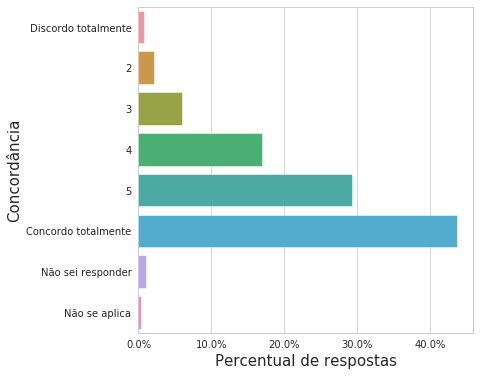

In [73]:
# Imprimindo o texto do item
print('\n\033[1m' + 'QE_I27' + '\033[0m' + '- As disciplinas cursadas contribuíram' +
      ' para sua \nformação integral, como cidadão e profissional?')

# Definindo o tamanho da figura
fig, ax = plt.subplots(figsize=(6,6))

# Criando dataframe com o percentual de cada resposta
qe_i27 = pd.DataFrame(df_ava.QE_I27.value_counts()/df_ava.QE_I27.count()*100).reset_index()

# Definindo o nome das colunas
qe_i27.columns = ['QE_I27', 'PERCENT']

# Gerando a figura
ax = sns.barplot('PERCENT', 'QE_I27', data=qe_i27, orient = 'h')

# Definindo o nome do eixo horizontal
ax.set_xlabel('Percentual de respostas', fontsize=15)

# Definindo o nome do eixo vertical
ax.set_ylabel('Concordância', fontsize=15)


# Formatando o eixo vertical como percentagem
ax.xaxis.set_major_formatter(mtick.PercentFormatter()) 

# Alterando o xticklabels
ylabels = ['Discordo totalmente', '2', '3', '4', '5', 'Concordo totalmente','Não sei responder',
           'Não se aplica']
ax.set_yticklabels(ylabels, rotation=0)

# Exibindo a figura sem mensagem de retorno
plt.show()

**QE_I28** - Os conteúdos abordados nas disciplinas do curso favoreceram sua atuação em estágios ou em atividades de iniciação profissional?


QE_I28- Os conteúdos abordados nas disciplinas do curso
favoreceram sua atuação em estágios ou em atividades de 
iniciação profissional?


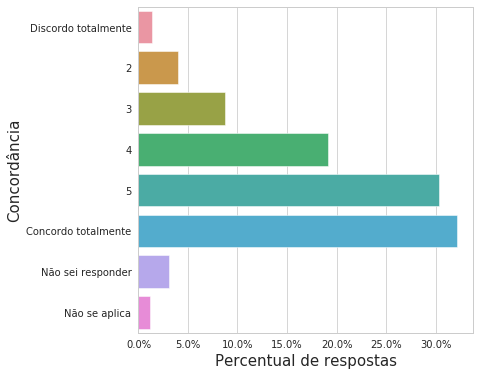

In [76]:
# Imprimindo o texto do item
print('\n\033[1m' + 'QE_I28' + '\033[0m' + '- Os conteúdos abordados nas disciplinas do curso' + 
      '\nfavoreceram sua atuação em estágios ou em atividades de \niniciação profissional?')

# Definindo o tamanho da figura
fig, ax = plt.subplots(figsize=(6,6))

# Criando dataframe com o percentual de cada resposta
qe_i28 = pd.DataFrame(df_ava.QE_I28.value_counts()/df_ava.QE_I28.count()*100).reset_index()

# Definindo o nome das colunas
qe_i28.columns = ['QE_I28', 'PERCENT']

# Gerando a figura
ax = sns.barplot('PERCENT', 'QE_I28', data=qe_i28, orient = 'h')

# Definindo o nome do eixo horizontal
ax.set_xlabel('Percentual de respostas', fontsize=15)

# Definindo o nome do eixo vertical
ax.set_ylabel('Concordância', fontsize=15)


# Formatando o eixo vertical como percentagem
ax.xaxis.set_major_formatter(mtick.PercentFormatter()) 

# Alterando o xticklabels
ylabels = ['Discordo totalmente', '2', '3', '4', '5', 'Concordo totalmente','Não sei responder',
           'Não se aplica']
ax.set_yticklabels(ylabels, rotation=0)

# Exibindo a figura sem mensagem de retorno
plt.show()

**QE_I61** - As condições de infraestrutura das salas de aula foram adequadas.


QE_I61- As condições de infraestrutura das salas de aula foram adequadas?


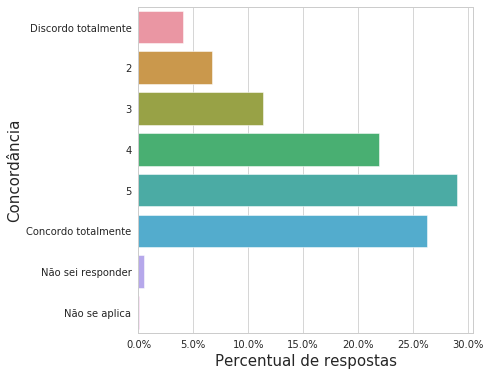

In [74]:
# Imprimindo o texto do item
print('\n\033[1m' + 'QE_I61' + '\033[0m' + '- As condições de infraestrutura das salas de aula foram adequadas?')

# Definindo o tamanho da figura
fig, ax = plt.subplots(figsize=(6,6))

# Criando dataframe com o percentual de cada resposta
qe_i61 = pd.DataFrame(df_ava.QE_I61.value_counts()/df_ava.QE_I61.count()*100).reset_index()

# Definindo o nome das colunas
qe_i61.columns = ['QE_I61', 'PERCENT']

# Gerando a figura
ax = sns.barplot('PERCENT', 'QE_I61', data=qe_i61, orient = 'h')

# Definindo o nome do eixo horizontal
ax.set_xlabel('Percentual de respostas', fontsize=15)

# Definindo o nome do eixo vertical
ax.set_ylabel('Concordância', fontsize=15)


# Formatando o eixo vertical como percentagem
ax.xaxis.set_major_formatter(mtick.PercentFormatter()) 

# Alterando o xticklabels
ylabels = ['Discordo totalmente', '2', '3', '4', '5', 'Concordo totalmente','Não sei responder',
           'Não se aplica']
ax.set_yticklabels(ylabels, rotation=0)

# Exibindo a figura sem mensagem de retorno
plt.show()

**QE_I64** - A biblioteca dispôs das referências bibliográficas que os estudantes necessitaram?


QE_I64- A biblioteca dispôs das referências bibliográficas
que os estudantes necessitaram?


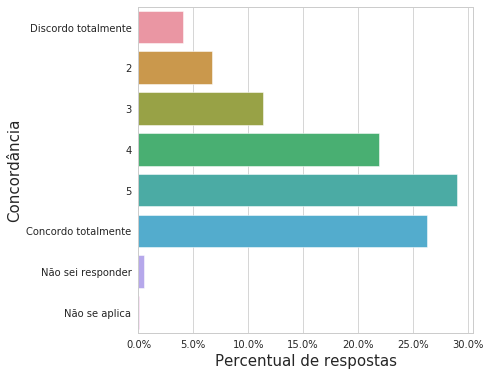

In [70]:
# Imprimindo o texto do item
print('\n\033[1m' + 'QE_I64' + '\033[0m' + '- A biblioteca dispôs das referências bibliográficas' +
      '\nque os estudantes necessitaram?')

# Definindo o tamanho da figura
fig, ax = plt.subplots(figsize=(6,6))

# Criando dataframe com o percentual de cada resposta
qe_i64 = pd.DataFrame(df_ava.QE_I61.value_counts()/df_ava.QE_I61.count()*100).reset_index()

# Definindo o nome das colunas
qe_i64.columns = ['QE_I64', 'PERCENT']

# Gerando a figura
ax = sns.barplot('PERCENT', 'QE_I64', data=qe_i64, orient = 'h')

# Definindo o nome do eixo horizontal
ax.set_xlabel('Percentual de respostas', fontsize=15)

# Definindo o nome do eixo vertical
ax.set_ylabel('Concordância', fontsize=15)


# Formatando o eixo vertical como percentagem
ax.xaxis.set_major_formatter(mtick.PercentFormatter()) 

# Alterando o xticklabels
ylabels = ['Discordo totalmente', '2', '3', '4', '5', 'Concordo totalmente','Não sei responder',
           'Não se aplica']
ax.set_yticklabels(ylabels, rotation=0)

# Exibindo a figura sem mensagem de retorno
plt.show()

**QE_I68** - A instituição dispôs de refeitório, cantina e banheiros em condições adequadas que atenderam as necessidades dos seus usuários?


QE_I68- A instituição dispôs de refeitório, cantina e banheiros
em condições adequadas que atenderam as necessidades dos seus usuários?


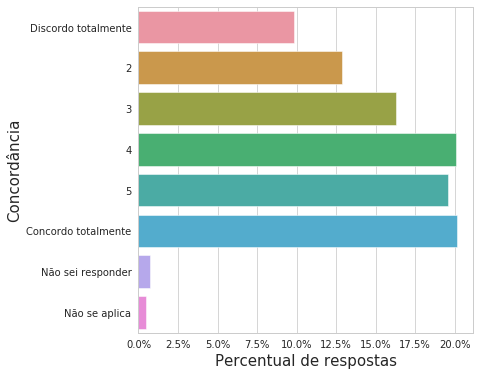

In [62]:
# Imprimindo o texto do item
print('\n\033[1m' + 'QE_I68' + '\033[0m' + '- A instituição dispôs de refeitório, cantina e banheiros' +
      '\nem condições adequadas que atenderam as necessidades dos seus usuários?')

# Definindo o tamanho da figura
fig, ax = plt.subplots(figsize=(6,6))

# Criando dataframe com o percentual de cada resposta
qe_i68 = pd.DataFrame(df_ava.QE_I68.value_counts()/df_ava.QE_I68.count()*100).reset_index()

# Definindo o nome das colunas
qe_i68.columns = ['QE_I68', 'PERCENT']

# Gerando a figura
ax = sns.barplot('PERCENT', 'QE_I68', data=qe_i68, orient = 'h')

# Definindo o nome do eixo horizontal
ax.set_xlabel('Percentual de respostas', fontsize=15)

# Definindo o nome do eixo vertical
ax.set_ylabel('Concordância', fontsize=15)


# Formatando o eixo vertical como percentagem
ax.xaxis.set_major_formatter(mtick.PercentFormatter()) 

# Alterando o xticklabels
ylabels = ['Discordo totalmente', '2', '3', '4', '5', 'Concordo totalmente','Não sei responder',
           'Não se aplica']
ax.set_yticklabels(ylabels, rotation=0)

# Exibindo a figura sem mensagem de retorno
plt.show()